In [1]:
!pip install nltk matplotlib wordcloud imageio



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 544.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


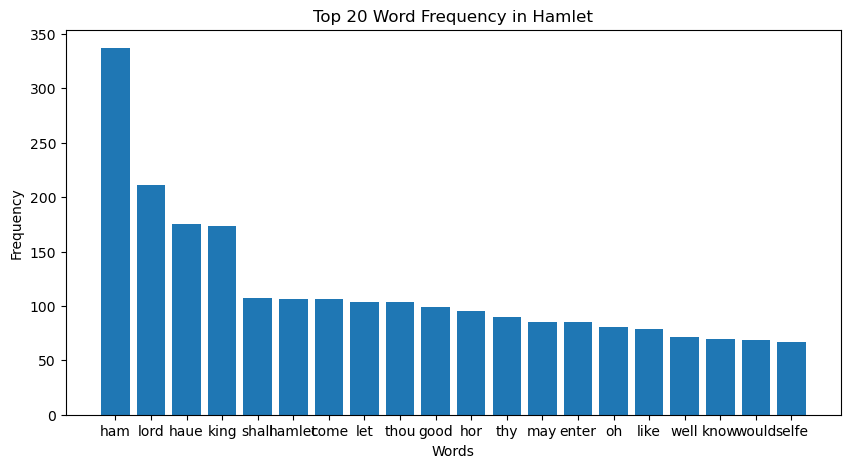

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6128\320612735.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


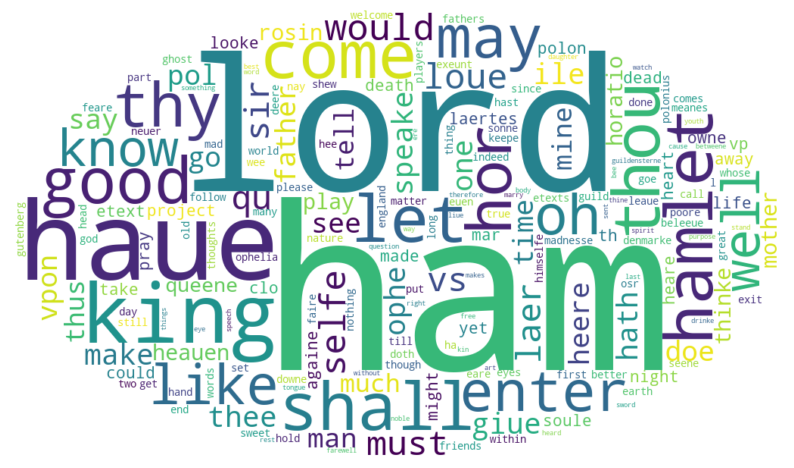

In [2]:
import nltk
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import imageio

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text


tokens = word_tokenize(data)


tokens = [word.lower() for word in tokens]

words = [word for word in tokens if word.isalpha()]


stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]


word_freq = Counter(words)

top_20_words = word_freq.most_common(20)
words, freqs = zip(*top_20_words)
plt.figure(figsize=(10,5))
plt.bar(words, freqs)
plt.title('Top 20 Word Frequency in Hamlet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(background_color='white', mask=mask_image).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
